## Import dependencies

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Load training data

In [2]:
train_data_file = "train.csv"
train_data = pd.read_csv(train_data_file)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Fill NaN with mean values

In [39]:
train_data["Age"].fillna(value = train_data["Age"].mean(), inplace = True)

## Select data to train the model

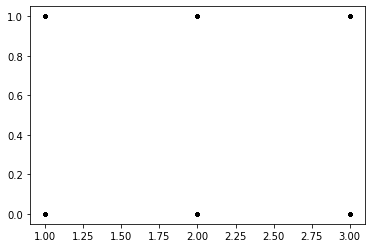

In [40]:
# Select input
input_values = train_data.loc[:, ["Pclass", "Age", "SibSp", "Parch", "Fare"]].copy()

# Select flag values
flag_values = train_data["Survived"].copy()

# Plot data
plt.plot(input_values["Pclass"], flag_values, "k.")
plt.show()

## Split data for training, validation and testing

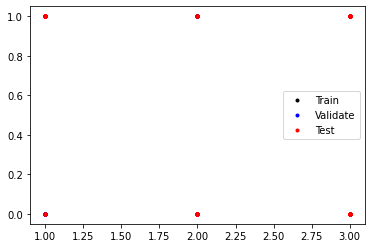

In [41]:
SAMPLES = train_data.shape[0]

# 65% for training
TRAIN_SPLIT = int(0.65 * SAMPLES)
# 25% for testing (so next division at 65% + 25% = 90%)
TEST_SPLIT = int(0.25 * SAMPLES + TRAIN_SPLIT)

# Store new data sets
input_train, input_validate, input_test = np.split(input_values, [TRAIN_SPLIT, TEST_SPLIT])
flag_train, flag_validate, flag_test = np.split(flag_values, [TRAIN_SPLIT, TEST_SPLIT])

# Plot
plt.plot(input_train["Pclass"], flag_train, "k.", label="Train")
plt.plot(input_validate["Pclass"], flag_validate, "b.", label="Validate")
plt.plot(input_test["Pclass"], flag_test, "r.", label="Test")
plt.legend()
plt.show()

## Define the ML model

In [47]:
from tensorflow.keras import layers

model = tf.keras.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape=(5,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1))

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


## Train the ML model

In [48]:
titanic2_ml = model.fit(input_train, flag_train, epochs=50, batch_size=32, validation_data=(input_validate, input_validate))

Epoch 1/50
19/19 [==============================] - 1s 10ms/step - loss: 11.5027 - mae: 1.6478 - val_loss: 1174.8363 - val_mae: 13.7848
Epoch 2/50
19/19 [==============================] - 0s 3ms/step - loss: 1.2917 - mae: 0.6677 - val_loss: 1228.4622 - val_mae: 13.8028
Epoch 3/50
19/19 [==============================] - 0s 3ms/step - loss: 0.2978 - mae: 0.4633 - val_loss: 1238.2305 - val_mae: 13.8328
Epoch 4/50
19/19 [==============================] - 0s 3ms/step - loss: 0.2752 - mae: 0.4563 - val_loss: 1230.6520 - val_mae: 13.8012
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.2708 - mae: 0.4473 - val_loss: 1236.7053 - val_mae: 13.7889
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.2697 - mae: 0.4632 - val_loss: 1232.8296 - val_mae: 13.7880
Epoch 7/50
19/19 [==============================] - 0s 3ms/step - loss: 0.2855 - mae: 0.4656 - val_loss: 1246.4791 - val_mae: 13.8517
Epoch 8/50
19/19 [==============================] - 0s 4ms/s

## Output analysis

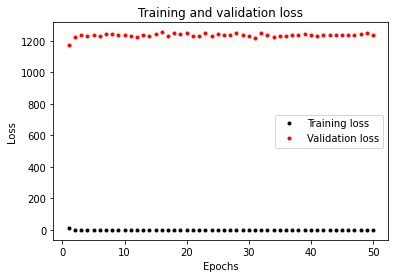

In [49]:
def graph_loss(model, skip=0):
  loss = model.history["loss"]
  val_loss = model.history["val_loss"]

  epochs = range(1, len(loss) + 1)

  plt.plot(epochs[skip:], loss[skip:], "k.", label = "Training loss")
  plt.plot(epochs[skip:], val_loss[skip:], "r.", label = "Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

graph_loss(titanic2_ml)

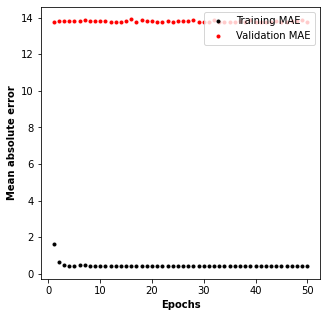

In [50]:
mae = titanic2_ml.history["mae"]
val_mae = titanic2_ml.history["val_mae"]
epochs = range(1, len(mae) + 1)
skip = 0

fig, ax1 = plt.subplots(1, 1, figsize=(5,5))

ax1.plot(epochs[skip:], mae[skip:], "k.", label = "Training MAE")
ax1.plot(epochs[skip:], val_mae[skip:], "r.", label = "Validation MAE")
text_pos_x = 0.10
text_pos_y = 0.95
#ax1.text(text_pos_x, text_pos_y, "(b) PM10", transform=ax1.transAxes)
ax1.set_xlabel("Epochs", fontweight="bold")
ax1.set_ylabel("Mean absolute error", fontweight="bold")
ax1.legend(loc='upper right')
plt.show()